<div style="width:100%;border-collapse:separate;border:solid 2px;border-radius:14px;">
    <div style="display:flex;">
        <div style="display:inline;width:5%;"></div>
        <div style="display:inline;width:15%;">NSIT</div>
        <div style="display:inline;width:15%;">e99a</div>
        <div style="display:inline;width:70%;text-align:right;"><b>Bachotage</b></div>
        <div style="display:inline;width:5%;"></div>
    </div>
    <div  style="display: flex;background-color:#EEE">
        <p style="width:100%;text-align:center;">Sujet 0: 2020-2021 </p>
    </div>
    <div  style="display: flex;">
        <p style="width:100%;text-align:center;">Correction des exercices 1, 2 et 3</p>
    </div>
</div>

<div class = "alert alert-success">
    
**Objectifs de la séquence:** 
- Proposer des programmes répondant aux exercices 1 ,2 3
- Apporfondir de la question 2: programmation dynamique(mémoïsation)

<div class = "alert alert-info">
    
**Sommaire :**

<a href=#ex1>Exercice 1:</a> Le crêpier psycho-rigide  
<a href=#ex2>Exercice 2:</a>  Optimisation d'une somme (chemins dans un taleau)  
<a href=#ex3>Exercice 3:</a>  Arbres binaires et ABR(Implémentation avec un tableau)  
</div>

<div id="ex1"></div>

## Exercice 1: Le crêpier psycho-rigide

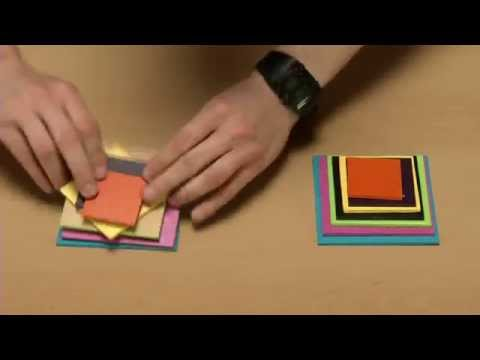

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('o6-4g4I6mOg', width = 800, height = 600)
# Vidéo explicative de l'Inria d'une version de ce problème (ici, les crêpes ont un sens): Voir à partir de 2min00s

Pour faire foncitonner les programmes on propose ici une programmation fonctionnelle des piles.  
Cette implémentation repose sur une liste. Elle est compatible avec les primitives données dans l'énoncé:
![ennonce_ex_1](https://github.com/ebuonocore/NSIT_99_bachotage/blob/main/NSIT_99a_sujet0_2020_2021_1a3/sources/ex1_primitives_pile.png?raw=true)

In [22]:
def creer_pile_vide():
    return [] #Renvoie une liste vide

def est_vide(pile):
    return len(pile)==0 #Renvoie True si la pile est vide, sinon False

def empiler(pile, valeur):
    pile.append(valeur) #Ajoute valeur en bout de liste. Ce qui correspond au haut de la pile

def depiler(pile):
    return pile.pop() #Renvoie le dernier élément de la liste après l'avoir supprimé

def afficher(pile):
    for i in range(len(pile)): #Parcourt tous les éléments de la liste et les affiche
        print('|\t', pile[-i-1],'\t|')

# Test des primitives et de l'affichage
P = creer_pile_vide()
empiler(P, 8)
empiler(P, 5)
empiler(P, 2)
empiler(P, 3)
depiler(P)
empiler(P, 4)
afficher(P)

|	 4 	|
|	 2 	|
|	 5 	|
|	 8 	|


In [23]:
# Question 1
Q = creer_pile_vide()
while not est_vide(P):
    empiler(Q, depiler(P))
print("Contenu de la pile P:")
afficher(P)
print("Contenu de la pile Q:")
afficher(Q)

Contenu de la pile P:
Contenu de la pile Q:
|	 8 	|
|	 5 	|
|	 2 	|
|	 4 	|


In [24]:
# Question 2.1: hauteur_pile()
def hauteur_pile (P):
    Q = creer_pile_vide()
    n = 0
    while not (est_vide(P)):
        n = n + 1
        x = depiler(P)
        empiler(Q, x)
    while not(est_vide(Q)):
        x = depiler(Q)
        empiler(P, x)
    return n
print("Hauteur de la pile Q:",hauteur_pile(Q))

Hauteur de la pile Q: 4


In [25]:
# Question 2.2: max_pile()
empiler(P, 8)
empiler(P, 5)
empiler(P, 2)
empiler(P, 4)

def max_pile(P, i):
    assert i <= hauteur_pile(P), "La pile compte moins de i éléments"
    # Initialisation
    rang = 1 # L'indice de l'élément en cours de traitement
    rang_maxi = 1 # le rang du maximum en cours
    maxi = depiler(P) # au début, le maximum est le premier élément ...
    empiler(P, maxi) # ... que l'on rempile immédiatement
    Q = creer_pile_vide() # une pile vide pour stocker les éléments traités
    # On lit tous les éléments jusqu'au i-ième pour trouver le maximum
    while rang <= i:
        x = depiler(P)
        if x > maxi:
            maxi = x
            rang_maxi = rang
            empiler(Q, x)
            rang += 1
    # On reconstitue la pile P
    while not(est_vide(Q)):
        empiler(P, depiler(Q))
    return rang_maxi

print("Maximum des 3 plus hauts éléments de P:",max_pile(P,3))

IndexError: pop from empty list

In [ ]:
# Question 3: retrouner()
def retourner(P, j):
    assert j <= hauteur_pile(P), "La pile compte moins de j éléments"
    # Initialisation
    Q = creer_pile_vide() # une pile vide pour vider P
    R = creer_pile_vide() # une pile vide pour vider Q
    rang = 1 # le rang de l'élément en cours de traitement
    # On dépile les j premiers éléments dans Q
    while rang <= j:
        empiler(Q, depiler(P))
        rang += 1
    # On vide Q dans R
    while not(est_vide(Q)):
        empiler(R, depiler(Q))
    # On vide R dans P
    while not(est_vide(R)):
        empiler(P, depiler(R))
    # La fonction ne renvoie rien (en réalité None en python)
    # On peut tout aussi bien se passer de retour
    # ce qui aura le même effet lors de l'exécution
    return None

In [ ]:
# Question 4: tri_crepes()
def tri_crepes(P) :
    assert not est_vide(P), "Il n'y a pas de crêpes à trier !"
    h = hauteur_pile(P)
    for i in range(0, h-1):
        rang_maxi = max_pile(P, h-i)
        retourner(P, rang_maxi)
        retourner(P, h-i)
    # La fonction ne renvoie rien (en réalité None en python)
    # On peut tout aussi bien se passer de retour
    # ce qui aura le même effet lors de l'exécution
    return None

<div id="ex2"></div>

## Exercice 2:  Optimisation d'une somme (chemins dans un taleau)

-

<div id="ex3"></div>

## Exercice 3: Arbres binaires et ABR(Implémentation avec un tableau

-

---
<p style="font-family:Comic Sans MS; text-align: center; color:gray; font-size: x-small; ">- Eric Buonocore. Janvier 2021 -<br></p>

![Licence CC BY NC SA](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)